In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('obama.csv', parse_dates = ['year_month'])
data.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


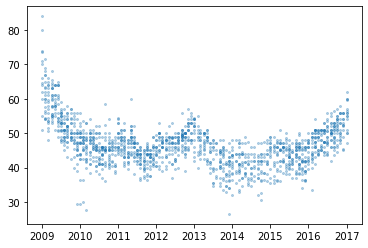

In [3]:
plt.plot(data.year_month, data.approve_percent, 'o', markersize = 2, alpha = 0.3)
plt.show()

In [4]:
#Aggregations
mean_data = data.groupby('year_month').mean()
median_data = data.groupby('year_month').median()
percentalile_25 =  data.groupby('year_month').quantile(0.25)
percentalile_75 =  data.groupby('year_month').quantile(0.75)

In [5]:
mean_data
median_data

,approve_percent,disapprove_percent
year_month,,
2009-01-01,66.00,17.00
2009-02-01,61.00,26.00
2009-03-01,58.00,31.50
2009-04-01,59.50,31.50
2009-05-01,58.50,33.50
...,...,...
2016-09-01,50.00,48.00
2016-10-01,52.25,44.25
2016-11-01,51.00,42.50


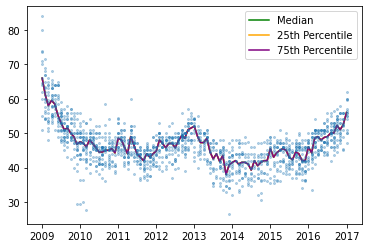

In [6]:

plt.plot(median_data.index, median_data.approve_percent, 'green')
plt.plot(percentalile_25.index, median_data.approve_percent, 'orange')
plt.plot(percentalile_75.index, median_data.approve_percent, 'purple')
plt.legend(['Median', '25th Percentile', '75th Percentile'])

plt.plot(data.year_month, data.approve_percent, 'o', markersize = 2, alpha = 0.3)
plt.show()

In [7]:
# Random Sampling
big_data = pd.read_csv("obama_too_big.csv", parse_dates =['year_month'])

In [8]:
big_data.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,Generated Data,67.0,31.0
1,2009-01-01,Harris (Phone),60.0,29.0
2,2009-01-01,Generated Data,65.9,19.1
3,2009-01-01,Generated Data,64.6,18.4
4,2009-01-01,Generated Data,83.3,11.7


In [9]:
big_data.shape

(65499, 4)

In [10]:
data.shape

(1530, 4)

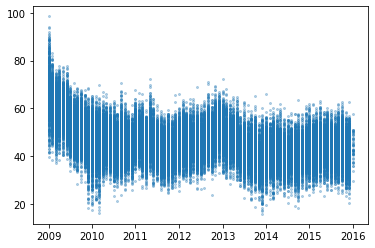

In [11]:
plt.plot(big_data.year_month, big_data.approve_percent, 'o', markersize = 2, alpha = 0.3)
plt.show()

In [12]:
sampled_data = big_data.sample(frac=0.1) # Can also use n=10000 to specify a number of samples instead

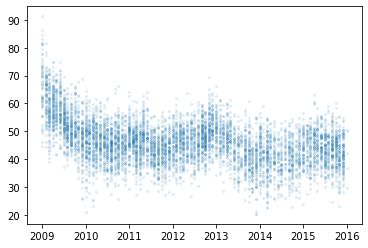

In [13]:
plt.plot(sampled_data.year_month, sampled_data.approve_percent, 'o', markersize = 2, alpha = 0.1)
plt.show()

In [14]:
country_data = pd.read_csv("countries.csv")
country_data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [15]:
mean_gdp_capita = country_data.groupby(['country']).mean().gdpPerCapita

In [16]:
Top5= mean_gdp_capita.sort_values(ascending = False).head()

In [17]:
Kuwait = country_data[country_data.country == 'Kuwait']
Kuwait.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


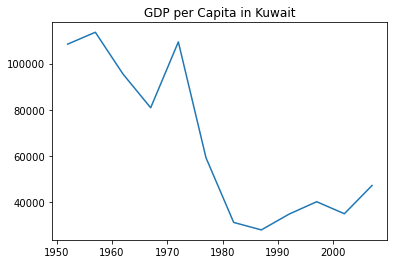

In [18]:
plt.plot(Kuwait.year,Kuwait.gdpPerCapita)
plt.title('GDP per Capita in Kuwait')
plt.show()

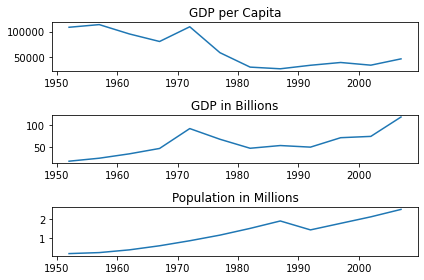

In [19]:
plt.subplot(3,1,1)
plt.plot(Kuwait.year,Kuwait.gdpPerCapita)
plt.title('GDP per Capita')

plt.subplot(3,1,2)
plt.plot(Kuwait.year,Kuwait.population * Kuwait.gdpPerCapita/ 10**9)
plt.title('GDP in Billions')

plt.subplot(3,1,3)
plt.plot(Kuwait.year,Kuwait.population / 10**6)
plt.title('Population in Millions')

plt.tight_layout() # to fix the layout
plt.show()

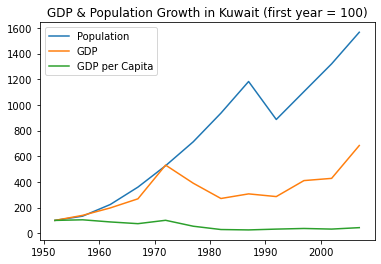

In [20]:
plt.plot(Kuwait.year,Kuwait.population/Kuwait.population.iloc[0] *100)

Kuwait_gdp = Kuwait.population * Kuwait.gdpPerCapita
plt.plot(Kuwait.year, Kuwait_gdp / Kuwait_gdp.iloc[0] *100)
plt.plot(Kuwait.year, Kuwait.gdpPerCapita/ Kuwait.gdpPerCapita.iloc[0] *100)
plt.title("GDP & Population Growth in Kuwait (first year = 100)")
plt.legend(['Population', 'GDP', 'GDP per Capita'])
plt.show()

In [21]:
Top5

country
Kuwait           65332.910472
Switzerland      27074.334405
Norway           26747.306554
United States    26261.151347
Canada           22410.746340
Name: gdpPerCapita, dtype: float64

In [22]:
US = country_data[country_data.country == 'United States']

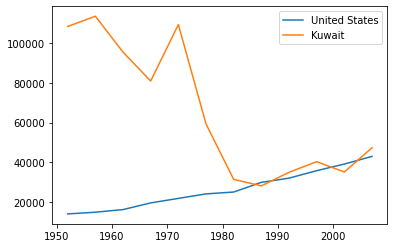

In [23]:
plt.plot(US.year, US.gdpPerCapita)
plt.plot(Kuwait.year, Kuwait.gdpPerCapita)
plt.legend(['United States', 'Kuwait'])
plt.show()